# **xG (Expected Goals) Baseline Model**

In [1]:
# Import Basic Libraries

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)


from tqdm.auto import tqdm   # For Visualizing Progress Bars While Code Is Being Executed


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, brier_score_loss


import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')



# Import the Thesis' VAEP Baseline Model's Functions Module

import Thesis_xG_Baseline_Model_Functions as TxGFs




%matplotlib inline


___

## Load-In the Data For the xG Model


 Loading & Reading In the Final Version of the Augmented Training Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Relevant Data of the Augmented Training Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 5) 

∴ The Total Number of Shots Taken Throughout the Augmented Training Dataset Relevant For the xG Model  =  50000 

∴ The Total Number of Goals Scored Throughout the Augmented Training Dataset Relevant For the xG Model  =  5792 

∴ The Total Number of Non-Scored Shots Throughout the Augmented Training Dataset Relevant For the xG Model  =  44208 



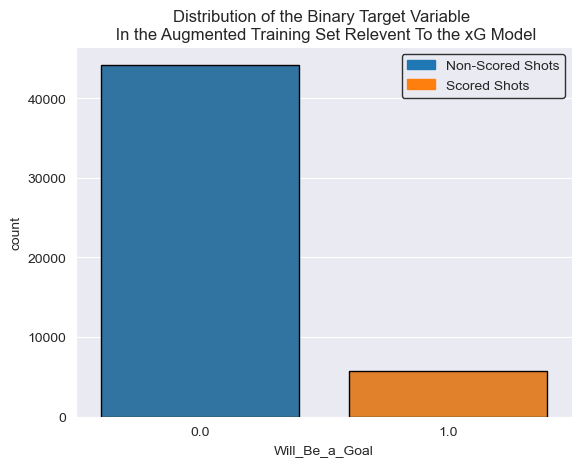

,X,Y,Dist_Between_Ball_TargetGoal,Angle_Between_Ball_TargetGoal_Rad,Will_Be_a_Goal
0,3954.164734,75.414643,1298.027891,0.184409,0.0
1,4460.000000,1030.000000,1298.075499,0.155449,1.0
2,4032.000000,-2212.000000,2525.166925,0.139433,0.0
3,3587.352812,241.656470,1680.117115,0.202312,1.0
4,4179.662052,975.461169,1448.153243,0.165660,0.0
5,585.767493,-552.685648,4696.863454,0.694161,0.0
6,2030.000000,3118.000000,4482.223109,0.107901,0.0
7,1092.996139,2569.568005,4887.060551,0.103955,0.0
8,2868.000000,191.000000,2389.645371,0.252603,0.0
9,1370.437850,1238.581922,4072.479300,0.296760,0.0


In [2]:
Augmented_Training_Relevant_Data_4_xG_Model = TxGFs.Read_Relevant_Tracking_Data_4_xG_Model( from_training_or_test_data = "training" )

Augmented_Training_Relevant_Data_4_xG_Model.head(10)


 Loading & Reading In the Final Version of the Test Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Relevant Data of the Test Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 5) 

∴ The Total Number of Shots Taken Throughout the Test Dataset Relevant For the xG Model  =  2416 

∴ The Total Number of Goals Scored Throughout the Test Dataset Relevant For the xG Model  =  280 

∴ The Total Number of Non-Scored Shots Throughout the Test Dataset Relevant For the xG Model  =  2136 



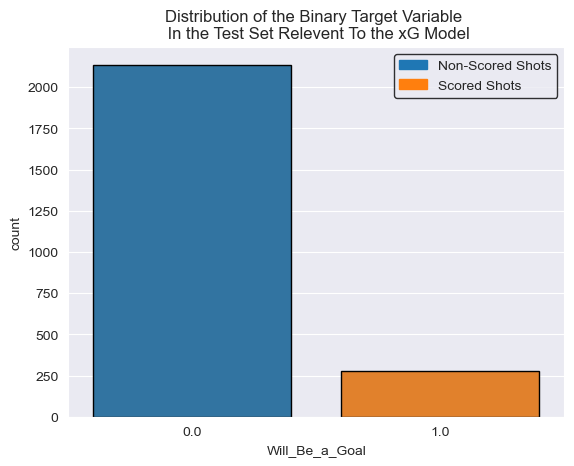

,X,Y,Dist_Between_Ball_TargetGoal,Angle_Between_Ball_TargetGoal_Rad,Will_Be_a_Goal
5412,4357.0,1362.0,1628.647598,0.152739,0.0
4642,3396.0,258.0,1871.865380,0.213371,0.0
7652,4321.0,291.0,973.510144,0.168138,1.0
589,2842.0,1571.0,2875.153039,0.197094,0.0
7214,4748.0,1798.0,1866.764045,0.134630,0.0
4987,3584.0,876.0,1882.267781,0.192114,0.0
1735,3773.0,863.0,1710.642569,0.183806,0.0
6952,4629.0,-562.0,837.547014,0.155434,1.0
7262,4432.0,485.0,950.972660,0.162754,0.0
3976,3254.0,132.0,2000.359968,0.223507,0.0


In [3]:
Test_Relevant_Data_4_xG_Model = TxGFs.Read_Relevant_Tracking_Data_4_xG_Model( from_training_or_test_data = "test" )

Test_Relevant_Data_4_xG_Model.head(10)

In [4]:

# Splitting the Data Into: Features & Target Variable

Features = ["X", "Y", "Dist_Between_Ball_TargetGoal", "Angle_Between_Ball_TargetGoal_Rad"]

Target_Variable = "Will_Be_a_Goal"



# Extracting the Data In the Proper Format To Be Able To Inject It Into the Model

X_train, y_train = Augmented_Training_Relevant_Data_4_xG_Model[ Features ], Augmented_Training_Relevant_Data_4_xG_Model[ Target_Variable ]

X_test, y_test = Test_Relevant_Data_4_xG_Model[ Features ], Test_Relevant_Data_4_xG_Model[ Target_Variable ]


In [5]:
X_train.shape

(50000, 4)

In [6]:
y_train.shape

(50000,)

In [7]:
X_test.shape

(2416, 4)

In [8]:
y_test.shape

(2416,)

___
___


## Data Transformations & Preprocessing:

- MaxAbs Scaler


___

## Logistic Regression Model:

### Objective/Cost Function = Loss Function + Regularization

- Loss Function  $\rightarrow$ Log-Loss - Measures the uncertainty of the probability estimates by the model. It penalizes both types of errors, but especially those predictions that are confident and wrong.

- Regularization/Penalty $\rightarrow$ L1 or L2-Norm


### Optimization Algorithm (To Minimize the Objective Function)

- 'sag' (Stochastic Average Gradient Descent); or

- `solver = 'saga'` (Stochastic Average Gradient Descent Aggregated) $\rightarrow$ An Optimization Algorithm To Minimize the Objective/Cost Function. Improved Version of 'sag' (Stochastic Average Gradient Descent) - More Versatile Than 'sag' & Can Converge Faster For Large Datasets


### Validation Metric

- ROC AUC-Score


___

## Cross-Validation Strategy

- Stratified Shuffled K-Fold CV $\rightarrow$ K = 5


___

## Hyper-Parameter Tuning/Optimization (HPO) Strategy:

- Grid-Search


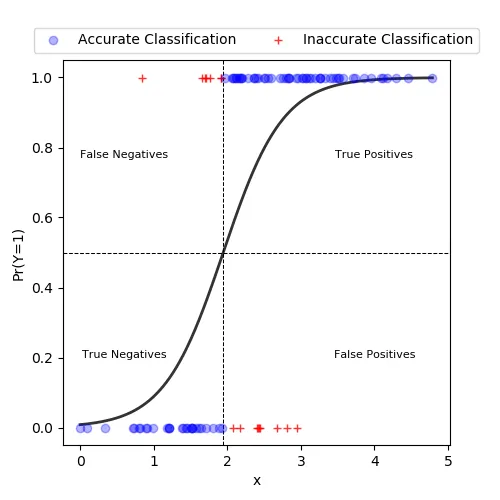

In [9]:
from IPython.display import Image

Image(filename = "Illustration of Logistic Regression.png", width = 500)

# Image Taken From:
# https://levelup.gitconnected.com/an-introduction-to-logistic-regression-in-python-with-statsmodels-and-scikit-learn-1a1fb5ce1c13
# Via images.google.com

In [10]:

# Min-Max Scaling & Logistic Regression Model With Different Class Weights - To Favour the Rows/Shots That Ended Up Being a Goal, To Account For the Class Imbalance:
                                                                                                                                                                      # 50000 Shots
                                                                                                                                                                      # 44208 Non-Scored Shots (No Goal)
                                                                                                                                                                      # 5792 Scored Shots (Goals)
            
# Column Transformer For Different Scalers

Scaler_Transformer = ColumnTransformer( transformers = [ ( "MaxAbsScaler", MaxAbsScaler( copy = True ), ["X", "Y", "Dist_Between_Ball_TargetGoal", "Angle_Between_Ball_TargetGoal_Rad"] ) ] )


# Instanciating the Logistic Regression Model

Logistic_Regression_Model = LogisticRegression( class_weight = "balanced", fit_intercept = True, random_state = 7 )

                            # class_weight = "balanced" --> Automatically Adjust Weights Inversely Proportional To Class Frequencies In the Input Data As: Class_Label_Weight = n_samples / ( n_classes * np.bincount(Class_Label_y) )



xG_Model_Pipeline = Pipeline( [ ( "Scaler", Scaler_Transformer ),
                                ( "Logistic_Regression_Model", Logistic_Regression_Model ) ] )


# Logistic Regression Model Hyper-Parameter Grid

HyperParameter_Space_Dict = [ { "Logistic_Regression_Model__C" : [ 0.001, 0.002, 0.004, 0.005, 0.006, 0.008,
                                                                   0.01, 0.02, 0.04, 0.05, 0.06, 0.08,
                                                                   0.1, 0.2, 0.4, 0.5, 0.6, 0.8,
                                                                   1, 2, 4, 5, 6, 8,
                                                                   10, 20, 40, 50, 60, 80, 100 ],
                                "Logistic_Regression_Model__penalty" : ["l2"],
                                "Logistic_Regression_Model__solver" : ["sag", "saga"],  # 'saga' support both 'l1' and 'l2' - but 'sag' ONLY supports 'l2'
                                "Logistic_Regression_Model__tol" : [0.0001, 0.001] ,
                                "Logistic_Regression_Model__max_iter" : [100, 500, 1000] },
                             
                              { "Logistic_Regression_Model__C" : [ 0.001, 0.002, 0.004, 0.005, 0.006, 0.008,
                                                                   0.01, 0.02, 0.04, 0.05, 0.06, 0.08,
                                                                   0.1, 0.2, 0.4, 0.5, 0.6, 0.8,
                                                                   1, 2, 4, 5, 6, 8,
                                                                   10, 20, 40, 50, 60, 80, 100 ],
                                "Logistic_Regression_Model__penalty" : ["l1"],
                                "Logistic_Regression_Model__solver" : ["saga"],   # 'saga' supports both 'l1' and 'l2'
                                "Logistic_Regression_Model__tol" : [0.0001, 0.001] ,
                                "Logistic_Regression_Model__max_iter" : [100, 500, 1000] } ]
                                


# Set #Splits

Num_K_Splits = 5


Validation_Size = 0.3


# Stratified Shuffled K Split
    
Stratified_Shuffled_K_Splits_CV = StratifiedShuffleSplit( n_splits = Num_K_Splits, test_size = Validation_Size, random_state = 7 )



# Hyper-Parameter Grid-Search With Cross-Validation (CV) - Thus, Hyper-Parameter Tuning/Optimization (HPO)


HP_Grid_Search_With_CV = GridSearchCV( estimator = xG_Model_Pipeline, param_grid = HyperParameter_Space_Dict, cv = Stratified_Shuffled_K_Splits_CV, scoring = "roc_auc", error_score = "raise", verbose = 3,
                                       refit = True )  # Refit An Estimator Using the Best Found Parameters On the Whole Training (Training + Validation) Dataset !

HP_Grid_Search_With_CV.fit(X_train, y_train)



Fitting 5 folds for each of 558 candidates, totalling 2790 fits
[CV 1/5] END Logistic_Regression_Model__C=0.001, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.0s
[CV 2/5] END Logistic_Regression_Model__C=0.001, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.615 total time=   0.0s
[CV 3/5] END Logistic_Regression_Model__C=0.001, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.621 total time=   0.0s
[CV 4/5] END Logistic_Regression_Model__C=0.001, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.622

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END Logistic_Regression_Model__C=4, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=4, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.611 total time=   0.4s
[CV 3/5] END Logistic_Regression_Model__C=4, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=4, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=4, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=4, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=4, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.611 total time=   0.4s
[CV 3/5] END Logistic_Regression_Model__C=4, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.2s
[CV 4/5] END Logistic_Regression_Model__C=4, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.2s
[CV 5/5] END Logistic_Regression_Model__C=4, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=4, Logistic_Regression

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=5, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.4s
[CV 3/5] END Logistic_Regression_Model__C=5, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.3s
[CV 4/5] END Logistic_Regression_Model__C=5, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=5, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=5, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.2s
[CV 2/5] END Logistic_Regression_Model__C=5, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.610 total time=   0.3s
[CV 3/5] END Logistic_Regression_Model__C=5, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.2s
[CV 4/5] END Logistic_Regression_Model__C=5, Logistic_Regressio

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=6, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=6, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=6, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=6, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.2s
[CV 2/5] END Logistic_Regression_Model__C=6, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.610 total time=   0.4s
[CV 3/5] END Logistic_Regression_Model__C=6, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.3s
[CV 4/5] END Logistic_Regression_Model__C=6, Logistic_Regressio

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.5s
[CV 1/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.6s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.610 total time=   0.6s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.5s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.613 total time=   0.4s
[CV 1/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.1s
[CV 2/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.1s
[CV 3/5] END Logistic_Regression_Model__C=8, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.1s
[CV 4/5] END Logistic_Regression_Model__C=8, Logistic_Regr

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.611 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.5s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.5s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.5s
[CV 1/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.611 total time=   0.4s
[CV 3/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.5s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.5s
[CV 5/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.1s
[CV 2/5] END Logistic_Regression_Model__C=10, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.1s
[CV 3/5] END Logistic_Regression_Model__C=10, Logistic_R

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.5s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.4s
[CV 1/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.3s
[CV 2/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.610 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.5s
[CV 5/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.1s
[CV 2/5] END Logistic_Regression_Model__C=20, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.1s
[CV 3/5] END Logistic_Regression_Model__C=20, Logistic_R

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.616 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.2s
[CV 2/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.610 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.616 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.1s
[CV 2/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.1s
[CV 3/5] END Logistic_Regression_Model__C=40, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.1s
[CV 4/5] END Logistic_Regression_Model__C=40, Logistic

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.611 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.5s
[CV 1/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.610 total time=   0.4s
[CV 3/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.611 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.613 total time=   0.4s
[CV 1/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.1s
[CV 2/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.1s
[CV 3/5] END Logistic_Regression_Model__C=50, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.1s
[CV 4/5] END Logistic_Regression_Model__C=50, Logistic

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.616 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.611 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.616 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.611 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.1s
[CV 2/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.1s
[CV 3/5] END Logistic_Regression_Model__C=60, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.2s
[CV 4/5] END Logistic_Regression_Model__C=60, Logistic

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.4s
[CV 2/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.3s
[CV 2/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.610 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.613 total time=   0.4s
[CV 1/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.2s
[CV 2/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.1s
[CV 3/5] END Logistic_Regression_Model__C=80, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.1s
[CV 4/5] END Logistic_Regression_Model__C=80, Logistic

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.5s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.0001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.610 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.618 total time=   0.4s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.617 total time=   0.3s


C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=sag, Logistic_Regression_Model__tol=0.001;, score=0.613 total time=   0.3s
[CV 1/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.617 total time=   0.1s
[CV 2/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.610 total time=   0.2s
[CV 3/5] END Logistic_Regression_Model__C=100, Logistic_Regression_Model__max_iter=100, Logistic_Regression_Model__penalty=l2, Logistic_Regression_Model__solver=saga, Logistic_Regression_Model__tol=0.0001;, score=0.618 total time=   0.1s
[CV 4/5] END Logistic_Regression_Model__C=100, Log

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.3,
            train_size=None),
             error_score='raise',
             estimator=Pipeline(steps=[('Scalers',
                                        ColumnTransformer(transformers=[('-1_1_Scaler',
                                                                         MinMaxScaler(feature_range=(-1,
                                                                                                     1)),
                                                                         ['Y']),
                                                                        ('0_1_Scaler',
                                                                         MinMaxScaler(),
                                                                         ['X',
                                                                          'Dist_Between_Ball_TargetGoal',
                                                                          'Angle_Between_Ball_TargetGoal_Rad'])])),
                                       ('...
                         {'Logistic_Regression_Model__C': [0.001, 0.002, 0.004,
                                                           0.005, 0.006, 0.008,
                                                           0.01, 0.02, 0.04,
                                                           0.05, 0.06, 0.08,
                                                           0.1, 0.2, 0.4, 0.5,
                                                           0.6, 0.8, 1, 2, 4, 5,
                                                           6, 8, 10, 20, 40, 50,
                                                           60, 80, ...],
                          'Logistic_Regression_Model__max_iter': [100, 500,
                                                                  1000],
                          'Logistic_Regression_Model__penalty': ['l1'],
                          'Logistic_Regression_Model__solver': ['saga'],
                          'Logistic_Regression_Model__tol': [0.0001, 0.001]}],
             scoring='roc_auc', verbose=3)

### **↑ Run-Time ≈ 11mins**

In [11]:
HP_Grid_Search_With_CV.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_Logistic_Regression_Model__C', 'param_Logistic_Regression_Model__max_iter', 'param_Logistic_Regression_Model__penalty', 'param_Logistic_Regression_Model__solver', 'param_Logistic_Regression_Model__tol', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [12]:

# Best Parameters & Validation Scores - Thus, Model Selection

print('\n')

print(f"Best Hyper-Parameters = \033[91m\033[1m\033[4m{HP_Grid_Search_With_CV.best_params_}\033[0m", '\n')





Best Hyper-Parameters = {'Logistic_Regression_Model__C': 0.001, 'Logistic_Regression_Model__max_iter': 100, 'Logistic_Regression_Model__penalty': 'l2', 'Logistic_Regression_Model__solver': 'sag', 'Logistic_Regression_Model__tol': 0.001} 



In [13]:

Validation_ROC_AUC_Score_of_1st_Fold = HP_Grid_Search_With_CV.cv_results_["split0_test_score"][HP_Grid_Search_With_CV.best_index_]

print(f"Validation ROC AUC-Score of 1st Fold (of the Best Mean Score) = {Validation_ROC_AUC_Score_of_1st_Fold}", "\n")


Validation_ROC_AUC_Score_of_2st_Fold = HP_Grid_Search_With_CV.cv_results_["split1_test_score"][HP_Grid_Search_With_CV.best_index_]

print(f"Validation ROC AUC-Score of 2nd Fold (of the Best Mean Score) = {Validation_ROC_AUC_Score_of_2st_Fold}", "\n")


Validation_ROC_AUC_Score_of_3st_Fold = HP_Grid_Search_With_CV.cv_results_["split2_test_score"][HP_Grid_Search_With_CV.best_index_]

print(f"Validation ROC AUC-Score of 3rd Fold (of the Best Mean Score) = {Validation_ROC_AUC_Score_of_3st_Fold}", "\n")


Validation_ROC_AUC_Score_of_4th_Fold = HP_Grid_Search_With_CV.cv_results_["split3_test_score"][HP_Grid_Search_With_CV.best_index_]

print(f"Validation ROC AUC-Score of 4th Fold (of the Best Mean Score) = {Validation_ROC_AUC_Score_of_4th_Fold}", "\n")


Validation_ROC_AUC_Score_of_5th_Fold = HP_Grid_Search_With_CV.cv_results_["split4_test_score"][HP_Grid_Search_With_CV.best_index_]

print(f"Validation ROC AUC-Score of 5th Fold (of the Best Mean Score) = {Validation_ROC_AUC_Score_of_5th_Fold}", "\n")


Validation ROC AUC-Score of 1st Fold (of the Best Mean Score) = 0.6176471915310779 

Validation ROC AUC-Score of 2nd Fold (of the Best Mean Score) = 0.6149811300584711 

Validation ROC AUC-Score of 3rd Fold (of the Best Mean Score) = 0.6210934266449787 

Validation ROC AUC-Score of 4th Fold (of the Best Mean Score) = 0.6220427156402981 

Validation ROC AUC-Score of 5th Fold (of the Best Mean Score) = 0.6133713236933821 



In [14]:

Best_Mean_Validation_ROC_AUC_Score = HP_Grid_Search_With_CV.best_score_

print(f"Best Mean Validation ROC AUC-Score = \033[91m\033[1m\033[4m{Best_Mean_Validation_ROC_AUC_Score}\033[0m", '\n')


STD_of_Best_Mean_Validation_ROC_AUC_Score = HP_Grid_Search_With_CV.cv_results_["std_test_score"][HP_Grid_Search_With_CV.best_index_]

print(f"STD of the Best Mean Validation ROC AUC-Score = \033[91m\033[1m\033[4m{STD_of_Best_Mean_Validation_ROC_AUC_Score}\033[0m", "\n")


SEM = STD_of_Best_Mean_Validation_ROC_AUC_Score / np.sqrt( Num_K_Splits )   # Calculate the Standard Error of the Mean (SEM)

print(f"Standard Error of the Mean (SEM) = \033[91m\033[1m\033[4m{SEM}\033[0m", "\n")
      
      
print(f"Hence, Final Validation Result = {Best_Mean_Validation_ROC_AUC_Score.round(3)} ± {SEM.round(3)}", "\n")


Best Mean Validation ROC AUC-Score = 0.6178271575136416 

STD of the Best Mean Validation ROC AUC-Score = 0.003359349919903494 

Standard Error of the Mean (SEM) = 0.001502346956222537 

Hence, Final Validation Result = 0.618 ± 0.002 



___
___

## Training With Best Hyper-Parameters On Full Training Dataset + Testing On Hold-Out Test Dataset

Training-Testing Procedure:   0%|          | 0/5 [00:00<?, ?it/s]

TRAIN-TEST ITERATION #1
Train ROC AUC-Score = 0.620987500403042
Final Evaluation/Testing of the xG (Logistic Regression) Model On the Hold-Out Test Dataset - For Train-Test Iteration #1 !  ↓
RESULTS OF ==> TRAIN-TEST ITERATION #1 

Test Brier-Score = 0.24567400985109966
Classification Report: 

              precision    recall  f1-score   support

         0.0       0.91      0.50      0.64      2136
         1.0       0.14      0.64      0.23       280

    accuracy                           0.51      2416
   macro avg       0.53      0.57      0.44      2416
weighted avg       0.82      0.51      0.60      2416



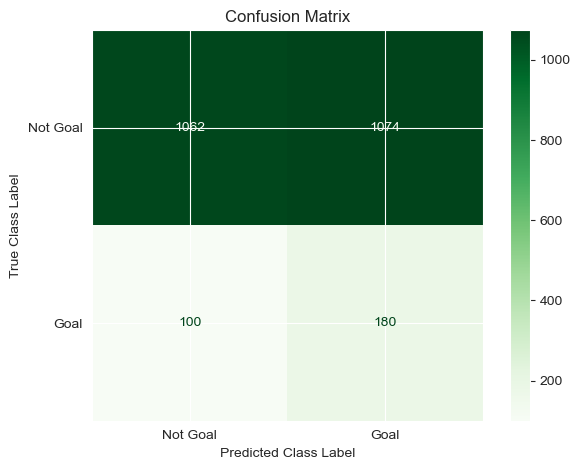

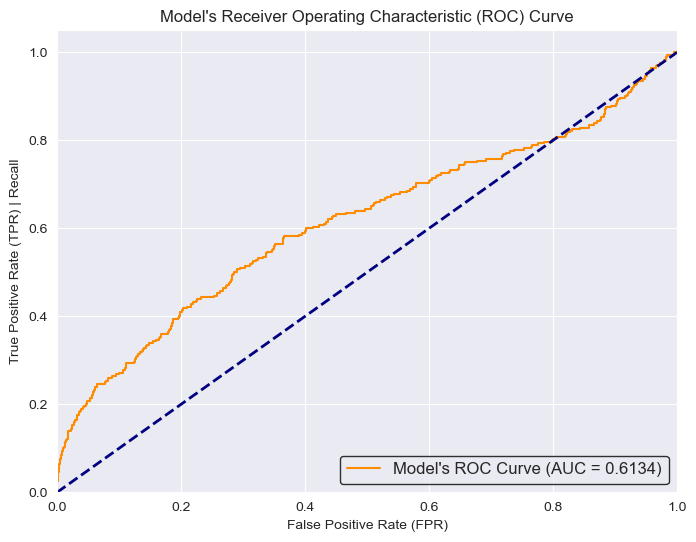

Test ROC AUC-Score = 0.613399545211343
TRAIN-TEST ITERATION #2
Train ROC AUC-Score = 0.6209864068783081
Final Evaluation/Testing of the xG (Logistic Regression) Model On the Hold-Out Test Dataset - For Train-Test Iteration #2 !  ↓
RESULTS OF ==> TRAIN-TEST ITERATION #2 

Test Brier-Score = 0.24650271397202578
Classification Report: 

              precision    recall  f1-score   support

         0.0       0.92      0.49      0.64      2136
         1.0       0.14      0.66      0.24       280

    accuracy                           0.51      2416
   macro avg       0.53      0.57      0.44      2416
weighted avg       0.83      0.51      0.59      2416



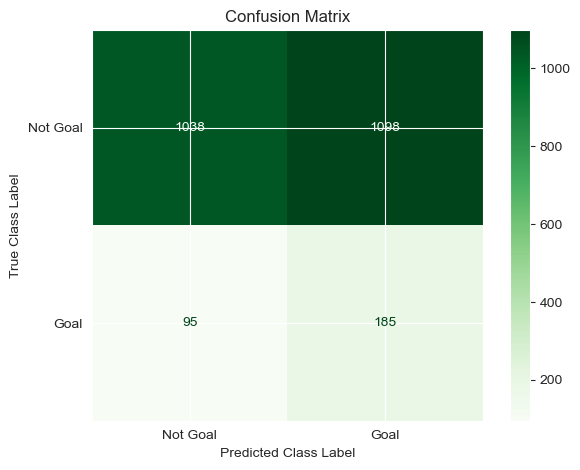

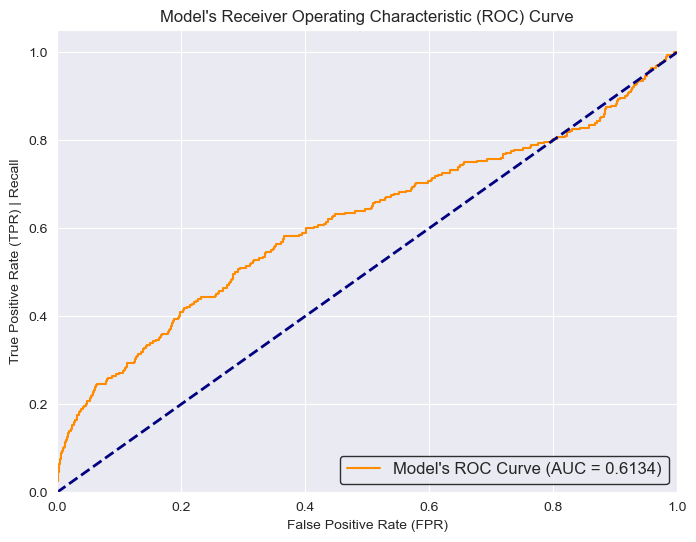

Test ROC AUC-Score = 0.6134095773140716
TRAIN-TEST ITERATION #3
Train ROC AUC-Score = 0.6209883283574833
Final Evaluation/Testing of the xG (Logistic Regression) Model On the Hold-Out Test Dataset - For Train-Test Iteration #3 !  ↓
RESULTS OF ==> TRAIN-TEST ITERATION #3 

Test Brier-Score = 0.24673130839664176
Classification Report: 

              precision    recall  f1-score   support

         0.0       0.92      0.48      0.63      2136
         1.0       0.14      0.66      0.24       280

    accuracy                           0.50      2416
   macro avg       0.53      0.57      0.43      2416
weighted avg       0.83      0.50      0.59      2416



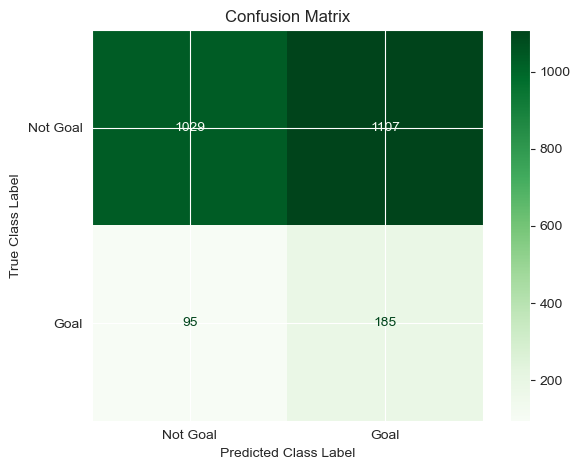

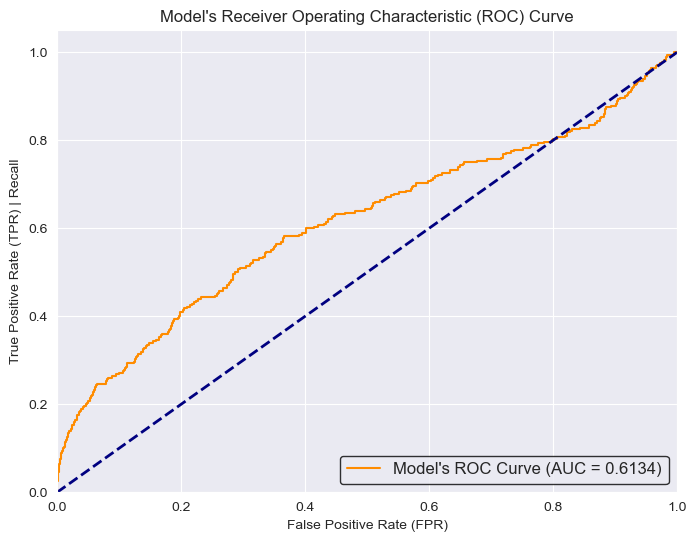

Test ROC AUC-Score = 0.613399545211343
TRAIN-TEST ITERATION #4
Train ROC AUC-Score = 0.6209884533317386
Final Evaluation/Testing of the xG (Logistic Regression) Model On the Hold-Out Test Dataset - For Train-Test Iteration #4 !  ↓
RESULTS OF ==> TRAIN-TEST ITERATION #4 

Test Brier-Score = 0.24549131795471243
Classification Report: 

              precision    recall  f1-score   support

         0.0       0.91      0.50      0.65      2136
         1.0       0.14      0.64      0.24       280

    accuracy                           0.52      2416
   macro avg       0.53      0.57      0.44      2416
weighted avg       0.83      0.52      0.60      2416



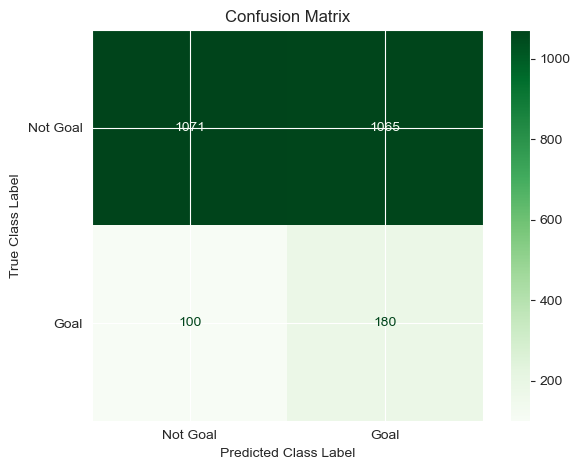

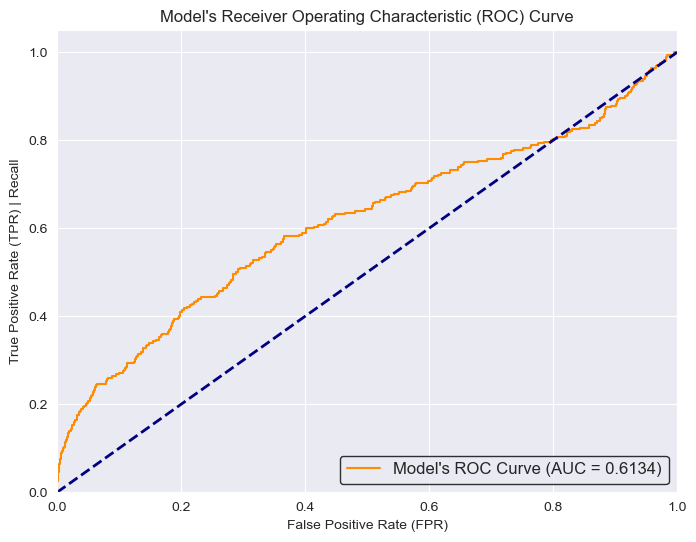

Test ROC AUC-Score = 0.6134028892455858
TRAIN-TEST ITERATION #5
Train ROC AUC-Score = 0.620989378922317
Final Evaluation/Testing of the xG (Logistic Regression) Model On the Hold-Out Test Dataset - For Train-Test Iteration #5 !  ↓
RESULTS OF ==> TRAIN-TEST ITERATION #5 

Test Brier-Score = 0.2463470148775724
Classification Report: 

              precision    recall  f1-score   support

         0.0       0.92      0.49      0.64      2136
         1.0       0.14      0.66      0.24       280

    accuracy                           0.51      2416
   macro avg       0.53      0.57      0.44      2416
weighted avg       0.83      0.51      0.59      2416



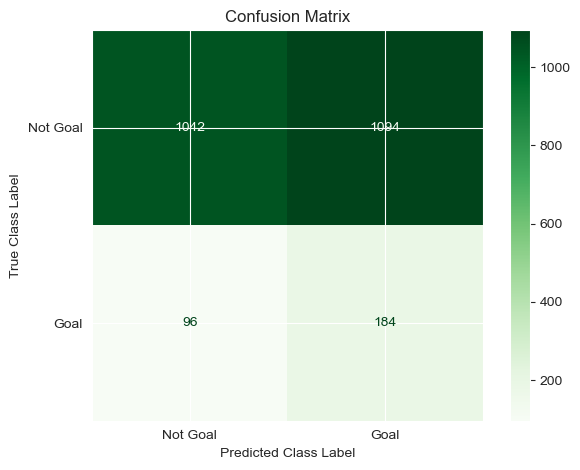

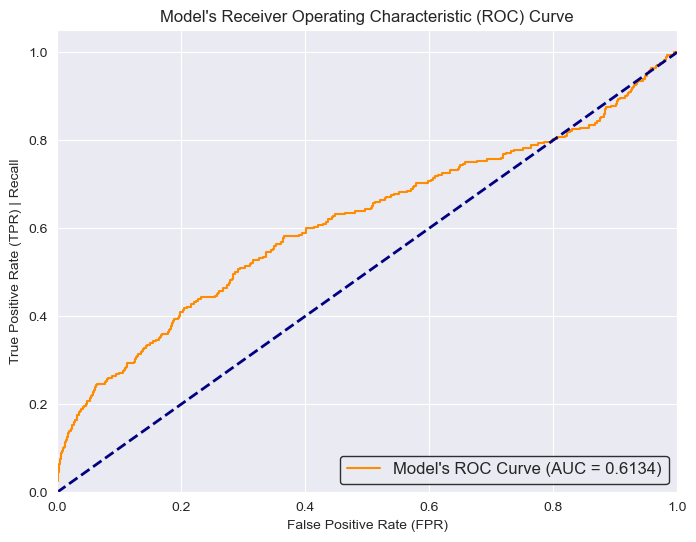

Test ROC AUC-Score = 0.6134062332798287
Final (Re-)Training On the Entire Training Dataset, Using the Best HPs + Testing/Evaluation On Hold-Out Test Dataset Is Over !  ↓


In [16]:

Num_of_Train_Test_Iterations = Num_K_Splits  # == 5


# Initialize the Dictionary of Test Class Labels' Predicted Probabilities & Class Label Classification/Prediction (Values) Per Train-Test Iteration (Keys)

Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict = {}


# Initialize the Dictionary of Metrics' Scores (Values) Per Train-Test Iteration (Keys)

Metrics_Scores_Per_Train_Test_Iteration_dict = {}



for Train_Test_Iteration_ID in tqdm( range(0, Num_of_Train_Test_Iterations), desc = "Training-Testing Procedure" ):
    
    Train_Test_Iteration_Counter = Train_Test_Iteration_ID + 1
    
    print("===============================================================================================================================================================================================================")
    
    print(f"TRAIN-TEST ITERATION #{Train_Test_Iteration_Counter}")
    
    
    # Column Transformer For Different Scalers

    Scaler_Transformer = ColumnTransformer( transformers = [ ( "MaxAbsScaler", MaxAbsScaler( copy = True ), ["X", "Y", "Dist_Between_Ball_TargetGoal", "Angle_Between_Ball_TargetGoal_Rad"] ) ] )


    # Instanciating the Logistic Regression Model With the Best Hyper-Parameters

    Best_Logistic_Regression_Model = LogisticRegression( C = 0.001, penalty = "l2", solver = "sag", tol = 0.001, max_iter = 100, class_weight = "balanced",
                                                         fit_intercept = True, random_state = Train_Test_Iteration_Counter )

                                # class_weight = "balanced" --> Automatically Adjust Weights Inversely Proportional To Class Frequencies In the Input Data As: Class_Label_Weight = n_samples / ( n_classes * np.bincount(Class_Label_y) )



    xG_Model_Pipeline = Pipeline( [ ( "Scaler", Scaler_Transformer ),
                                    ( "Best_Logistic_Regression_Model", Best_Logistic_Regression_Model ) ] )    
    
    
    xG_Model_Pipeline.fit(X_train, y_train)
    
    
    y_train_Predicted_Class_Probabilities = xG_Model_Pipeline.predict_proba(X_train)[ : , 1]
    
    
    train_ROC_AUC_Score = roc_auc_score( y_train, y_train_Predicted_Class_Probabilities )
    
    print(f"Train ROC AUC-Score = \033[91m\033[1m\033[4m{train_ROC_AUC_Score}\033[0m")
    
    
    
    # Evaluate/Test On the Test Dataset
    
    print("===============================================================================================================================================================================================================")
    print(f"Final Evaluation/Testing of the xG (Logistic Regression) Model On the Hold-Out Test Dataset - For Train-Test Iteration #{Train_Test_Iteration_Counter} !  ↓")
    print("===============================================================================================================================================================================================================")
    
    print(f"RESULTS OF ==> TRAIN-TEST ITERATION \033[91m\033[1m\033[4m#{Train_Test_Iteration_Counter}\033[0m", "\n")
    
    
    
    # Testing/Evaluating the Hold-Out Test Dataset

    y_test_Predicted_Class_Labels = xG_Model_Pipeline.predict(X_test)

    y_test_Predicted_Class_Probabilities = xG_Model_Pipeline.predict_proba(X_test)[ : , 1]
    
    
    
    Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ Train_Test_Iteration_ID ] = { "Test True Class Labels" : y_test,
                                                                                                                        "Test Class Labels' Predicted Probabilities" : y_test_Predicted_Class_Probabilities,
                                                                                                                        "Test Predicted/Classified Class Labels" : y_test_Predicted_Class_Labels }
    
    
    
    # Test Brier-Score For the Current Train-Test Iteration
    
    test_Brier_Score = brier_score_loss(y_test, y_test_Predicted_Class_Probabilities)
    
    # test_Brier_Score ≡ (1/Total_Shots_In_Test_Set) * np.sum( (y_test_Predicted_Class_Probabilities - y_test)**2 )     Where  ==>  Total_Shots_In_Test_Set = 2416

    print(f"Test Brier-Score = \033[91m\033[1m\033[4m{test_Brier_Score}\033[0m")
    
    
    
    # Displaying (Detailed) Classification Report + Confusion Matrix of the Test Set

    TxGFs.Display_Classification_Report_and_Confusion_Matrix( y_test_true_class_labels = y_test, y_test_pred_class_labels = y_test_Predicted_Class_Labels, confusion_matrix_cmap = "Greens" )
    
    
    
    # ROC Curve & Test ROC AUC-Score For the Current Train-Test Iteration

    test_ROC_AUC_Score = TxGFs.Plot_ROC_Curve_of_Unseen_Test_Set( y_test_true_class_labels = y_test, y_test_pred_class_probabilities = y_test_Predicted_Class_Probabilities, figure_size = (8, 6) )
    
    print(f"Test ROC AUC-Score = \033[91m\033[1m\033[4m{test_ROC_AUC_Score}\033[0m")
    
    
    
    Metrics_Scores_Per_Train_Test_Iteration_dict[ Train_Test_Iteration_ID ] = { "Training ROC AUC-Score" : train_ROC_AUC_Score,
                                                                                "Test Brier-Score" : test_Brier_Score,
                                                                                "Test ROC AUC-Score" : test_ROC_AUC_Score }
    
    
    
print("===============================================================================================================================================================================================================")
print("===============================================================================================================================================================================================================")
print(f"Final (Re-)Training On the Entire Training Dataset, Using the Best HPs + Testing/Evaluation On Hold-Out Test Dataset Is Over !  ↓")
print("===============================================================================================================================================================================================================")
print("===============================================================================================================================================================================================================")    
    

### **↑ Run-Time ≈ 3s**

___

### Mean Test ROC AUC-Score

In [19]:
# List of Test ROC AUC-Scores In Every Train-Test Iteration

Test_ROC_AUC_Scores_Produced_In_Every_Train_Test_Iteration_list = [ Metrics_Scores_Per_Train_Test_Iteration_dict[ 0 ]["Test ROC AUC-Score"], Metrics_Scores_Per_Train_Test_Iteration_dict[ 1 ]["Test ROC AUC-Score"],
                                                                    Metrics_Scores_Per_Train_Test_Iteration_dict[ 2 ]["Test ROC AUC-Score"], Metrics_Scores_Per_Train_Test_Iteration_dict[ 3 ]["Test ROC AUC-Score"],
                                                                    Metrics_Scores_Per_Train_Test_Iteration_dict[ 4 ]["Test ROC AUC-Score"] ]

# Mean Test ROC AUC-Score Produced By All Final Train-Test Iterations

Mean_Test_ROC_AUC_Score = np.mean( Test_ROC_AUC_Scores_Produced_In_Every_Train_Test_Iteration_list )

print(f"Mean Test ROC AUC-Score = \033[91m\033[1m\033[4m{Mean_Test_ROC_AUC_Score}\033[0m", "\n")



# Calculate the Margin of Error of the Mean Test ROC AUC-Score of the Train-Test Iterations

STD_of_Mean_Test_ROC_AUC_Scores_Across_Train_Test_Iterations = np.std( Test_ROC_AUC_Scores_Produced_In_Every_Train_Test_Iteration_list, ddof = 1 )   # `ddof = 1` For Sample Standard Deviation

print(f"Standard Deviation of the {Num_of_Train_Test_Iterations} Test ROC AUC-Scores of the Train-Test Iterations = \033[91m\033[1m\033[4m{STD_of_Mean_Test_ROC_AUC_Scores_Across_Train_Test_Iterations}\033[0m", "\n")

SEM = STD_of_Mean_Test_ROC_AUC_Scores_Across_Train_Test_Iterations / np.sqrt( Num_of_Train_Test_Iterations )   # Calculate the Standard Error of the Mean (SEM)

print(f"Standard Error of the Mean (SEM) = \033[91m\033[1m\033[4m{SEM}\033[0m", "\n")

## For a 95% Confidence Interval, the Margin of Error = SEM Multiplied By the Critical Value From the Student's t-Distribution (If the Sample Size Is Small or the Population STD Is Unknown)
##      or the Z-Distribution (For Large Sample Sizes or Known Population STF). The Critical Value For a 95% Confidence Level Is Typically 1.96 For Large Samples (Z-distribution).

from scipy import stats

alpha = 0.025

t_Distribution_Critical_Value = stats.t.ppf( q = 1 - alpha, df = Num_of_Train_Test_Iterations - 1 )   # Determine the t-Critical Value For 95% Confidence Interval/Level & 4 Degrees of Freedom / 2-Tailed ( ==> alpha * 2 = 0.5 )
                                                                                                          # `t.ppf` = Percent Point Function (Inverse of CDF — Percentiles)
Margin_of_Error = t_Distribution_Critical_Value * SEM

print(f"Margin of Error of the Mean Test ROC AUC-Score, For a 95% Confidence Interval = \033[91m\033[1m\033[4m{Margin_of_Error}\033[0m", "\n")

print(f"∴ Mean Test ROC AUC-Score To Report = \033[91m\033[1m\033[4m{Round_To_3SF( Mean_Test_ROC_AUC_Score )}\033[0m ± \033[91m\033[1m\033[4m{Round_To_3SF( Margin_of_Error )}\033[0m", "\n")


Mean Test ROC AUC-Score = 0.6134035580524344 

Standard Deviation of the 5 Test ROC AUC-Scores of the Train-Test Iterations = 4.360087215847975e-06 

Standard Error of the Mean (SEM) = 1.9498902804927738e-06 

Margin of Error of the Mean Test ROC AUC-Score, For a 95% Confidence Interval = 5.4137633249469245e-06 

∴ Mean Test ROC AUC-Score To Report = 0.613 ± 5.41e-06 



### ROC Curve For All 5 (Final) Train-Test Iterations

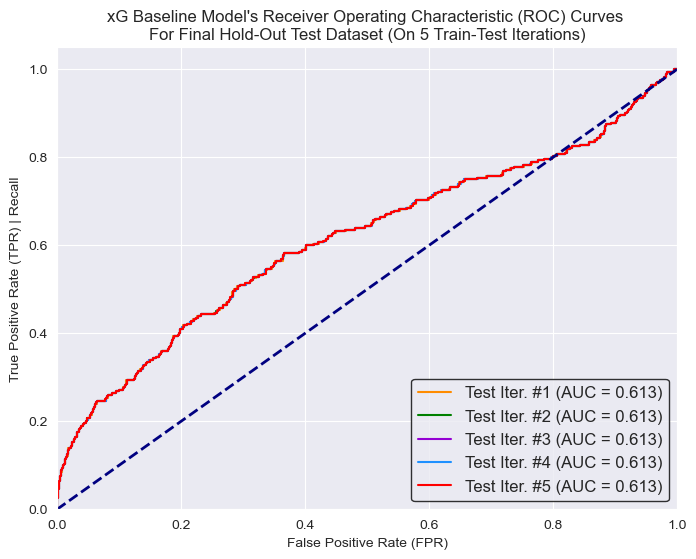

In [20]:

# Compute ROC Curve + ROC AUC For All Train-Test Iterations
    
FPR_Iteration_1, TPR_Iteration_1, Threshold_Iteration_1 = roc_curve( Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ 0 ][ "Test True Class Labels" ],
                                                                     Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ 0 ][ "Test Class Labels' Predicted Probabilities" ] )

FPR_Iteration_2, TPR_Iteration_2, Threshold_Iteration_2 = roc_curve( Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ 1 ][ "Test True Class Labels" ],
                                                                     Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ 1 ][ "Test Class Labels' Predicted Probabilities" ] )

FPR_Iteration_3, TPR_Iteration_3, Threshold_Iteration_3 = roc_curve( Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ 2 ][ "Test True Class Labels" ],
                                                                     Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ 2 ][ "Test Class Labels' Predicted Probabilities" ] )

FPR_Iteration_4, TPR_Iteration_4, Threshold_Iteration_4 = roc_curve( Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ 3 ][ "Test True Class Labels" ],
                                                                     Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ 3 ][ "Test Class Labels' Predicted Probabilities" ] )

FPR_Iteration_5, TPR_Iteration_5, Threshold_Iteration_5 = roc_curve( Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ 4 ][ "Test True Class Labels" ],
                                                                     Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ 4 ][ "Test Class Labels' Predicted Probabilities" ] )
    
Test_ROC_AUC_Score_For_Train_Test_Iteration_1 = Metrics_Scores_Per_Train_Test_Iteration_dict[ 0 ]["Test ROC AUC-Score"]
Test_ROC_AUC_Score_For_Train_Test_Iteration_2 = Metrics_Scores_Per_Train_Test_Iteration_dict[ 1 ]["Test ROC AUC-Score"]
Test_ROC_AUC_Score_For_Train_Test_Iteration_3 = Metrics_Scores_Per_Train_Test_Iteration_dict[ 2 ]["Test ROC AUC-Score"]
Test_ROC_AUC_Score_For_Train_Test_Iteration_4 = Metrics_Scores_Per_Train_Test_Iteration_dict[ 3 ]["Test ROC AUC-Score"]
Test_ROC_AUC_Score_For_Train_Test_Iteration_5 = Metrics_Scores_Per_Train_Test_Iteration_dict[ 4 ]["Test ROC AUC-Score"]
    

    
plt.figure( figsize = (8, 6) )
    

plt.plot( FPR_Iteration_1, TPR_Iteration_1, color = "darkorange", label = f"Test Iter. #1 (AUC = {Test_ROC_AUC_Score_For_Train_Test_Iteration_1:.3f})" )   # Plotting the ROC-Curve
plt.plot( FPR_Iteration_2, TPR_Iteration_2, color = "green", label = f"Test Iter. #2 (AUC = {Test_ROC_AUC_Score_For_Train_Test_Iteration_2:.3f})" )   # Plotting the ROC-Curve
plt.plot( FPR_Iteration_3, TPR_Iteration_3, color = "darkviolet", label = f"Test Iter. #3 (AUC = {Test_ROC_AUC_Score_For_Train_Test_Iteration_3:.3f})" )   # Plotting the ROC-Curve
plt.plot( FPR_Iteration_4, TPR_Iteration_4, color = "dodgerblue", label = f"Test Iter. #4 (AUC = {Test_ROC_AUC_Score_For_Train_Test_Iteration_4:.3f})" )   # Plotting the ROC-Curve
plt.plot( FPR_Iteration_5, TPR_Iteration_5, color = "red", label = f"Test Iter. #5 (AUC = {Test_ROC_AUC_Score_For_Train_Test_Iteration_5:.3f})" )   # Plotting the ROC-Curve
    
plt.plot( [0, 1], [0, 1], color = "navy", linewidth = 2, linestyle = "--" )   # Plotting the Threshold Limit line  ⇒  AUC_Threshold = 0.50
    

plt.xlim( [0.0, 1.0] )
    
plt.ylim( [0.0, 1.05] )
    

plt.title( f"xG Baseline Model's Receiver Operating Characteristic (ROC) Curves \nFor Final Hold-Out Test Dataset (On {Num_of_Train_Test_Iterations} Train-Test Iterations)", fontsize = 12 )
    
plt.xlabel( "False Positive Rate (FPR)", fontsize = 10 )
    
plt.ylabel( "True Positive Rate (TPR) | Recall", fontsize = 10 )
    

plt.legend( loc = "lower right", edgecolor = "k", fontsize = "large" )


plt.savefig(f"Figures/xG Baseline Model's ROC Curves For Final Hold-Out Test Dataset.png")
    
plt.show()



___

### Mean Test Brier-Score

In [17]:
def Round_To_3SF( number ):
    
    import math
    
    if number == 0:
        return 0
    else:
        # Determine the order of magnitude of the number
        order_of_magnitude = int(math.floor(math.log10(abs(number))))
        # Calculate the number of decimal places to round to
        decimal_places = 2 - order_of_magnitude
        # Round the number to the calculated number of decimal places
        return round(number, decimal_places)

In [18]:
# List of Test Brier-Scores In Every Train-Test Iteration

Test_Brier_Scores_Produced_In_Every_Train_Test_Iteration_list = [ Metrics_Scores_Per_Train_Test_Iteration_dict[ 0 ]["Test Brier-Score"], Metrics_Scores_Per_Train_Test_Iteration_dict[ 1 ]["Test Brier-Score"],
                                                                  Metrics_Scores_Per_Train_Test_Iteration_dict[ 2 ]["Test Brier-Score"], Metrics_Scores_Per_Train_Test_Iteration_dict[ 3 ]["Test Brier-Score"],
                                                                  Metrics_Scores_Per_Train_Test_Iteration_dict[ 4 ]["Test Brier-Score"] ]

# Mean Test Brier-Score Produced By All Final Train-Test Iterations

Mean_Test_Brier_Score = np.mean( Test_Brier_Scores_Produced_In_Every_Train_Test_Iteration_list )

print(f"Mean Test Brier-Score = \033[91m\033[1m\033[4m{Mean_Test_Brier_Score}\033[0m", "\n")



# Calculate the Margin of Error of the Mean Test Brier-Score of the Train-Test Iterations

STD_of_Mean_Test_Brier_Scores_Across_Train_Test_Iterations = np.std( Test_Brier_Scores_Produced_In_Every_Train_Test_Iteration_list, ddof = 1 )   # `ddof = 1` For Sample Standard Deviation

print(f"Standard Deviation of the {Num_of_Train_Test_Iterations} Test Brier-Scores of the Train-Test Iterations = \033[91m\033[1m\033[4m{STD_of_Mean_Test_Brier_Scores_Across_Train_Test_Iterations}\033[0m", "\n")

SEM = STD_of_Mean_Test_Brier_Scores_Across_Train_Test_Iterations / np.sqrt( Num_of_Train_Test_Iterations )   # Calculate the Standard Error of the Mean (SEM)

print(f"Standard Error of the Mean (SEM) = \033[91m\033[1m\033[4m{SEM}\033[0m", "\n")

## For a 95% Confidence Interval, the Margin of Error = SEM Multiplied By the Critical Value From the Student's t-Distribution (If the Sample Size Is Small or the Population STD Is Unknown)
##      or the Z-Distribution (For Large Sample Sizes or Known Population STF). The Critical Value For a 95% Confidence Level Is Typically 1.96 For Large Samples (Z-distribution).

from scipy import stats

alpha = 0.025

t_Distribution_Critical_Value = stats.t.ppf( q = 1 - alpha, df = Num_of_Train_Test_Iterations - 1 )   # Determine the t-Critical Value For 95% Confidence Interval/Level & 4 Degrees of Freedom / 2-Tailed ( ==> alpha * 2 = 0.5 )
                                                                                                          # `t.ppf` = Percent Point Function (Inverse of CDF — Percentiles)
Margin_of_Error = t_Distribution_Critical_Value * SEM

print(f"Margin of Error of the Mean Test Brier-Score, For a 95% Confidence Interval = \033[91m\033[1m\033[4m{Margin_of_Error}\033[0m", "\n")

print(f"∴ Mean Test Brier-Score To Report = \033[91m\033[1m\033[4m{Round_To_3SF( Mean_Test_Brier_Score )}\033[0m ± \033[91m\033[1m\033[4m{Round_To_3SF( Margin_of_Error )}\033[0m", "\n")


Mean Test Brier-Score = 0.2461492730104104 

Standard Deviation of the 5 Test Brier-Scores of the Train-Test Iterations = 0.0005388801991441006 

Standard Error of the Mean (SEM) = 0.00024099455140296654 

Margin of Error of the Mean Test Brier-Score, For a 95% Confidence Interval = 0.0006691081426221057 

∴ Mean Test Brier-Score To Report = 0.246 ± 0.000669 



___
___

## Saving the Class (True + Predicted) Labels & the Class Labels' Probabilities 

In [21]:
# Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ Train_Test_Iteration_ID ] = { "Test True Class Labels" : y_Test_True_Labels,
#                                                                                                                     "Test Class Labels' Predicted Probabilities" : y_Test_Predicted_Positive_Class_Label_Probabilities,
#                                                                                                                     "Test Predicted/Classified Class Labels" : y_Test_Predicted_Class_Labels }

# Iterating Through Each `Train_Test_Iteration_ID`

for Train_Test_Iteration_ID in Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict:
    
    # Extracting the Data For the Current `Train_Test_Iteration_ID`
    
    Train_Test_Iteration_dict = Test_True_and_Predicted_Class_Labels_and_Probabilities_Per_Train_Test_Iteration_dict[ Train_Test_Iteration_ID ]
    
    
    # Creating the DataFrame For That Train-Test Iteration
    
    df = pd.DataFrame( { "Will_Be_a_Goal" : Train_Test_Iteration_dict[ "Test True Class Labels" ], 
                         "xG Model Test Class Labels' Predicted Probabilities" : Train_Test_Iteration_dict[ "Test Class Labels' Predicted Probabilities" ], 
                         "xG Model Test Predicted/Classified Class Labels" : Train_Test_Iteration_dict[ "Test Predicted/Classified Class Labels" ] } )
    

    File_Name = f"xG Baseline Model's Test Class (True + Predicted) Labels & the Test Class Labels' Probabilities From the Final Train-Test Iteration #{Train_Test_Iteration_ID+1}.csv"
    
    
    # Saving the DataFrame To a CSV File
    
    df.to_csv(File_Name, index = False)

    print(f"Predicted Hold-Out Test Data For Train-Test Iteration #{Train_Test_Iteration_ID+1} Saved To '{File_Name}'", "\n")


Predicted Hold-Out Test Data For Train-Test Iteration #1 Saved To 'xG Baseline Model's Test Class (True + Predicted) Labels & the Test Class Labels' Probabilities From the Final Train-Test Iteration #1.csv' 

Predicted Hold-Out Test Data For Train-Test Iteration #2 Saved To 'xG Baseline Model's Test Class (True + Predicted) Labels & the Test Class Labels' Probabilities From the Final Train-Test Iteration #2.csv' 

Predicted Hold-Out Test Data For Train-Test Iteration #3 Saved To 'xG Baseline Model's Test Class (True + Predicted) Labels & the Test Class Labels' Probabilities From the Final Train-Test Iteration #3.csv' 

Predicted Hold-Out Test Data For Train-Test Iteration #4 Saved To 'xG Baseline Model's Test Class (True + Predicted) Labels & the Test Class Labels' Probabilities From the Final Train-Test Iteration #4.csv' 

Predicted Hold-Out Test Data For Train-Test Iteration #5 Saved To 'xG Baseline Model's Test Class (True + Predicted) Labels & the Test Class Labels' Probabilities F

___
___
___